# OpenCV fundamentals


OPENCV/PYTHON FUNDAMENTALS

Nir Herscovici | nir.herscovici@timet.com

1. Opening files from a local device.
2. Viewing values stored in a image-pixel array.
3. Classical image processing techniques.



## Python getting started

1. First we need to import the relevant libraries:
  * OpenCV, Numpy and others

2. Download relevant video handling scripts from GitHub


In [1]:

# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2023-09-27 18:44:35--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.01s   

2023-09-27 18:44:36 (4.62 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2023-09-27 18:44:36--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

In [2]:
input_image=cv2.imread('pcc.png') # Command to read image on file

We can find out various things about that image

In [3]:
print(input_image.size) # command to print image size (wxh) units of pixels

11445372


In [4]:
print(input_image.shape) # Image shape. Shape consists of (width, height, # of channels). Channels for a colored image are 3.



(1102, 3462, 3)


In [5]:
print(input_image.dtype) # Data type describes the variable types being stored within each image pixel. uint8 is an integer value of base 8.

uint8


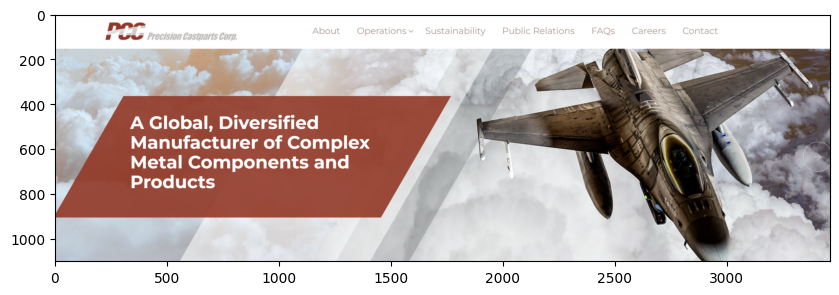

In [6]:
plt.imshow(input_image) # plt.imshow is a matplolib function to plot an opencv image on a traditional XY chart.

What the chart above illustrates, isa key aspect of OpenCV: Images stored in openCV are formated in non-standard B,G,R rather than R,G,B (Red, Blue, Green).

OpenCV provides a framework to split the number of color channels and reorganize.

Code below exemplifies the following:
1. splitting the input image into component form: blue, green, red
2. Plotting ONLY the 'red' channel on a 'grayscale' map.

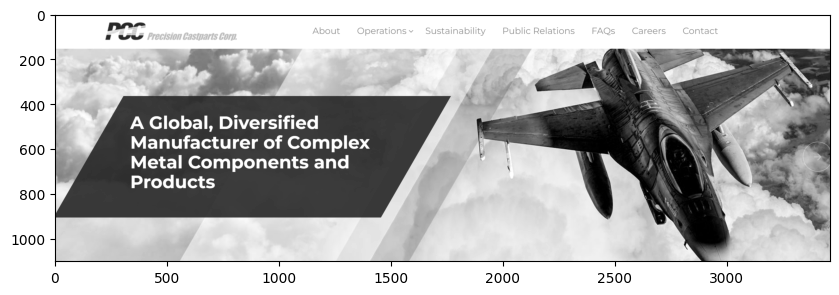

In [7]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')


## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

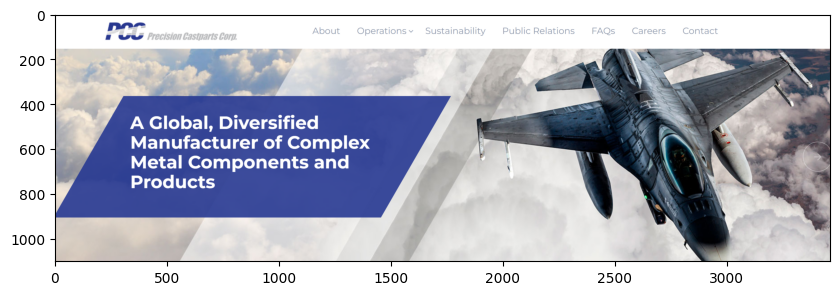

In [8]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)


OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done.

In [ ]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))

# If you want to see them all, rather than just a count uncomment the following line
#print(COLORflags)

In [ ]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)


## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [ ]:
pixel = input_image[100,100]
print(pixel)

In [ ]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on.

In [ ]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

In [ ]:
fresh_image=cv2.imread('noidea.jpg') # it's either start with a fresh read of the image,
                                  # or end up with dogfaces on dogfaces on dogfaces
                                   # as you re-run parts of the notebook but not others...

fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. The getting and setting of regions above uses slicing, though, and I'd like to finish this notebook with a little more detail on what is going on there.

In [ ]:
freshim2 = cv2.imread("noidea.jpg")
crop = freshim2[100:400, 130:300]
plt.imshow(crop)

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

In [ ]:
hsvim=cv2.cvtColor(freshim2,cv2.COLOR_BGR2HSV)
bcrop =hsvim[100:400, 100:300, 1]
plt.imshow(bcrop, cmap="gray")

# Image stats and image processing
This notebook follows on from the fundamentals notebook.

This will introduce some simple stats, smoothing, and basic image processing.

But first let us include what we need to include and load up our test image.

<p>
 Estimated time needed: <strong>20 min</strong>
</p>

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

input_image=cv2.imread('noidea.jpg')

## Basic manipulations

Rotate, flip...

In [ ]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)

In [ ]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

In [ ]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

## Minimum, maximum

To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately.

In [ ]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


## Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size.

In [ ]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Noise reduction
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing.

In [ ]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

In [ ]:
d=5
img_blur5 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur5, cv2.COLOR_BGR2RGB))

In [ ]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

## Edges

Edge detection is the final image processing technique we're going to look at in this tutorial.

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by **convolution**, and indeed **convolutional neural networks** are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. You can read more about the background to Sobel here in the OpenCV docs [here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html).

In [ ]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray')
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference


Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

In [ ]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

# Features in computer vision

Features are image locations that are "easy" to find in the future.  Indeed, one of the early feature detection techniques Lucas-Kanade, sometimes called Kanade-Lucas-Tomasi or KLT features come from a seminal paper called "Good features to track".

Edges find brightness discontinuities in an image, features find distinctive regions. There are a bunch of different feature detectors and these all have some characteristics in common: they should be quick to find, and things that are close in image-space are close in feature-space (that is, the feature representation of an object looks like the feature representation of objects that look like that object).

There is a more in depth *features in OpenCV* set of tutorials [here](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html) and I'll link to various parts of that as appropriate: for more background though, go and work through the whole thing.

<p>
 Estimated time needed: <strong>20 min</strong>
</p>

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# our usual set of includes
# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


input_image=cv2.imread('noidea.jpg')

## Corner detectors
If you think of edges as being lines, then corners are an obvious choice for features as they represent the intersection of two lines. One of the earlier corner detectors was introduced by Harris, and it is still a very effective corner detector that gets used quite a lot: it's reliable and it's fast. There's a tutorial explaining how Harris works on the OpenCV site [here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

In [ ]:
harris_test=input_image.copy()
#greyscale it
gray = cv2.cvtColor(harris_test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))

Properly speaking the Harris Corner detection is more like a Sobel operator - indeed it is very much like a sobel operator. It doesn't really return a set of features, instead it is a filter which gives a strong response on corner-like regions of the image. We can see this more clearly if we look at the Harris output from the cell above (dst is the Harris response, before thresholding). Well we can kind-of see. You should be able to see that there are slightly light places in the image where there are corner like features, and that there are really light parts of the image around the black and white corners of the writing

In [ ]:
plt.imshow(dst,cmap = 'gray')


## Moving towards feature space
When we consider modern feature detectors there are a few things we need to mention. What makes a good feature includes the following:

* Repeatability (got to be able to find it again)
* Distinctiveness/informativeness (features representing different things need to be different)
* Locality (they need to be local to the image feature and not, like, the whole image)
* Quantity (you need to be able to find enough of them for them to be properly useful)
* Accuracy (they need to accurately locate the image feature)
* Efficiency (they've got to be computable in reasonable time)

This comes from a good survey which you can find here (and which I'd thoroughly recommend reading if you're doing feature detection work) [here](https://www.slideshare.net/AhmedOne1/survey-1-project-overview)

**Note:** some of the very famous feature detectors (SIFT/SURF and so on) are around, but aren't in OpenCV by default due to patent issues. You can build them for OpenCV if you want - or you can find other implementations (David Lowe's SIFT implementation works just fine). Just google for instructions.  For the purposes of this tutorial (and to save time) we're only going to look at those which are actually in OpenCV.

In [ ]:
orbimg=input_image.copy()

orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orbimg,None)
# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)
# draw keypoints
cv2.drawKeypoints(orbimg,kp,orbimg)

plt.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))

## Matching features
Finding features is one thing but actually we want to use them for matching.
First let's get something where we know there's going to be a match


In [ ]:
img2match=np.zeros(input_image.shape,np.uint8)
dogface=input_image[60:250, 70:350] # copy out a bit
img2match[60:250,70:350]=[0,0,0] # blank that region
dogface=cv2.flip(dogface,0) #flip the copy
img2match[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface # paste it back somewhere else
plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

## Matching keypoints

The feature matching function (in this case Orb) detects and then computes keypoint descriptors. These are a higher dimensional representation of the image region immediately around a point of interest (sometimes literally called "interest points").

These higher-dimensional representations can then be matched; the strength you gain from matching these descriptors rather than image regions directly is that they have a certain invariance to transformations (like rotation, or scaling). OpenCV providers matcher routines to do this, in which you can specify the distance measure to use.

In [ ]:

kp2 = orb.detect(img2match,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img2match, kp2)
# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,des2)

# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 50 matches.
oimg = cv2.drawMatches(orbimg,kp,img2match,kp2,matches[:50], orbimg)

plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))


As you can see there are some false matches, but it's fairly clear that most of the matched keypoints found are actual matches between image regions on the dogface.

To be more precise about our matching we could choose to enforce **homography** constraints, which looks for features than sit on the same plane. If you want to investigate that check out this tutorial online
[here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html)

# Cascade Classification

One of the key things we can do with vision is object detect.

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf) and improved later by [Rainer Lienhart](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

OpenCV provides a training method ( see [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)) or pretrained models, that can be read using the cv2.CascadeClassifierload method. The pre-*trained* models are located in the data folder in the OpenCV installation or can be found [here](https://github.com/opencv/opencv/tree/3.4/data).

In this notebook we will play with some of the provided pre-trained haarcascades models. More on this topic can be found [here](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html).

<p>
 Estimated time needed: <strong>20 min</strong>
</p>

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [ ]:
# Load the test image and create a greyscale copy of it to be used in the classifiers

base_image = cv2.imread('test.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))

## Face Detection

We will use the pre-trained model haarcascade_frontalface_default.xml to detect faces in the photo. You can find more details about the parameters ofthe detectMultiScale function [here](https://docs.opencv.org/3.4/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498).

**Note**: In all examples, I reload the color image again, because the imshow function rewrites the original image with the boxes, but I use the same grayscale image for detection)

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

### Smile Detection

We will use the pre-trained model haarcascade_smile.xml to detect smiles on the pictures.

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(grey, 1.3, 20)
for (x,y,w,h) in smiles:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

As you can see, it detected the smiles correctly (the right guy, who is actually me, is not giving a full smile) but there are a lot of false positives, as usual in cascade models. Therefore, to improve this, we will only consider detected smiles inside previously detected faces.

In [ ]:
# this is a pre-trained face cascade
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Eye Detection

Using the pre-trained model haarcascade_frontalface_default.xml to detect faces on the pictures.

In [ ]:
test_image = cv2.imread('test.jpg')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(grey, 1.3, 1)
for (x,y,w,h) in eyes:
     cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Similar to what happened to the smiles, there is a few of false positives, and in this particular case a false negative (probably the glass confused the classifier). So we will use the same approach to filter recognized eyes that are inside faces.

In [ ]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  #cv2.rectangle(smile_faces_base_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

## Putting all together



In [ ]:
test_image = cv2.imread('test.jpg')
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
  for (x_s,y_s,w_s,h_s) in eyes:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(255,255,255),2)
  for (x_s,y_s,w_s,h_s) in smiles:
    if( (x <= x_s) and (y <= y_s) and ( x+w >= x_s+w_s) and ( y+h >= y_s+h_s)):
      cv2.rectangle(test_image, (x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

# Modern Object Recognition

Although most of this type of object detection has recently been replaced in the industry by solutions based on Deep Neural Networks models created and trained in platforms like [TensorFlow](https://www.tensorflow.org/), the Viola Jones method for face detection is still a really well respected detector.
And even in modern DNN-based systems OpenCV is still widely used for image manipulation, pre and post-processing .


# YOLO and COCO object recognition basics in Python

By [Mikolaj Buchwald (LI profile)](https://www.linkedin.com/in/mikolaj-buchwald/) -- [mikbuch's GitHub](github.com/mikbuch)

This tutorial is an adaptation of [the example](https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html) explained in the official OpenCV YOLO documentation. The reason for creating this Notebook is that I myself had difficulties recreating this example based on the aforementioned documentation. That is why I created this step-by-step Notebook when you can re-run all cells and get to know YOLO and coco better.

## YOLO -- an object detection network

> _YOLO — You Only Look Once — is an extremely fast multi object detection algorithm which uses convolutional neural network (CNN) to detect and identify objects._
>
> _The neural network has this network architecture._
>
> ![YOLO network archtecture](yolo1_net.png)
>
> Source: https://arxiv.org/pdf/1506.02640.pdf

I quote this explanation from: [OpenCV YOLO tutorial](https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html)


## COCO -- class labels for 80 objects

The class names are stored in the `coco.names` text file:

In [ ]:
# Clone The Repository Files
!git clone https://github.com/mikbuch/yolo-coco-opencv-example.git yolo_cv

In [ ]:
# Check The Count of Labeled Names
!cat ./yolo_cv/coco.names | wc -l

In [ ]:
# Obtain a Small Sample of Label Names
!cat ./yolo_cv/coco.names | head

## Troubleshooting/important notes

### High resolution images

Note, in order to use the code from this notebook with larger resolution images, you will have to adjust border width and font size in the cells below, else the borders will be very thin, almost unvisible on the final rendered picture, and the font size will be extremely small.

### `net.getUnconnectedOutLayers()` vector or matrix

It seems that, depending on the (OpenCV?) implementation, the `net.getUnconnectedOutLayers()` can be either a vector or a matrix. This problem is dealt with in this Notebook by `try`-`except` clause, but pay attention to that in your own use cases.


## Import prerequisites

As a matter of fact, we will need OpenCV for Python in this example (i.e., `cv2`). It is usually (by convention) imported like that: `import cv2`.

In [ ]:
import cv2
import numpy as np
import os
import time

from matplotlib import pyplot as plt

## Example image

OpenCV tutorial example image: https://opencv-tutorial.readthedocs.io/en/latest/_images/horse.jpg.  

In [ ]:
img_name = './yolo_cv/horse.jpg'

# Reading image to an object (we will display it in the next step).
img = cv2.imread(img_name)

### Color conversion while displaying the image

Matplotlib interprets images in RGB format, but OpenCV uses BGR format

So to convert the image so that it's properly loaded, convert it before loading (for details, see: https://www.codegrepper.com/code-examples/python/imshow+wrong+colors).

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

> _Load the YOLO network_
>
> _In order to run the network you will have to download the pre-trained YOLO weight file (237 MB). https://pjreddie.com/media/files/yolov3.weights_
>
> _Also download the the YOLO configuration file._
>
> _[yolov3.cfg](https://opencv-tutorial.readthedocs.io/en/latest/_downloads/10e685aad953495a95c17bfecd1649e5/yolov3.cfg)_

Source: https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html#load-the-yolo-network

#### Downloading the `yolov3.weights` file

The `yolov3.weights` file is pretty large, hence I couldn't include it in the reporitory with this example. We will have to make sure that this file is available for you -- by downloading the file:

In [ ]:
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights

In [ ]:
# Load names of classes and get random colors for them.
classes = open('yolo_cv/coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Give the configuration and weight files for the model and load the network.
net = cv2.dnn.readNetFromDarknet('yolo_cv/yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
#net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Show the network object
net

## Determine the output layer

In [ ]:
# First, get layer names
ln = net.getLayerNames()
len(ln)

In [ ]:
# Show names of all layers
print(ln)

In [ ]:
# Get output layers
net.getUnconnectedOutLayers()

It seems that, depending on the (OpenCV?) implementation, the `net.getUnconnectedOutLayers()` can be either a vector or a matrix. This problem is dealt with in this Notebook by `try`-`except` clause, but pay attention to that in your own use cases.

In [ ]:
# Show the names of this layers
try:
    print([ln[i[0] - 1] for i in net.getUnconnectedOutLayers()])
except IndexError:
    print([ln[i - 1] for i in net.getUnconnectedOutLayers()])

In [ ]:
# Use this layers
try:
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

ln

Blob is an input to the YOLO network.

In [ ]:
# Construct a blob from the image
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
r = blob[0, 0, :, :]

plt.imshow(r)
print('Blob shape=%s' % (blob.shape,))

In [ ]:
net.setInput(blob)
t0 = time.time()
outputs = net.forward(ln)
t = time.time()
print('It took %.3f seconds to process the image.' % (t-t0))

The outputs object are vectors of lenght 85 (4 + 1 + 80):

    4x the bounding box (centerx, centery, width, height)
    1x box confidence
    80x class confidence


In [ ]:
print('Found %s objects.' % len(outputs))

print('\nEnlisting objects:')
print([out.shape for out in outputs])

In [ ]:
boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]

        #  -- Arguments for CV2 rectangle:
        # cv2.rect   (img,  x, y,   width, height, color, line width)
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 4)

        # Labels and confidences for the image
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

print('Image preview:')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='none')

## Write image to the output file

In [ ]:
cv2.imwrite('output.png', img)

## Show image with bounding boxes

### Color conversion

Matplotlib interprets images in RGB format, but OpenCV uses BGR format. So to convert the image so that it's properly loaded, convert it before loading (for details, see: https://www.codegrepper.com/code-examples/python/imshow+wrong+colors)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=90)
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='none')

# YOLO Object Detection Using OpenCV and A Video


In [ ]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import time
import cv2
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import os

In [ ]:
# Clone the necessary project files
!git clone https://github.com/msalmankhaliq/YOLO-Object-detection-using-OpenCv.git yolo-coco
!wget --no-check-certificate \
    https://www.pexels.com/download/video/853889/ \
    -O video_test.mp4
!wget --no-check-certificate \
    https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg \
    -O yolo-coco/coco/yolov3-tiny.cfg

fatal: destination path 'yolo-coco' already exists and is not an empty directory.
--2023-09-26 22:05:23--  https://www.pexels.com/download/video/853889/
Resolving www.pexels.com (www.pexels.com)... 104.16.235.10, 104.16.234.10, 2606:4700::6810:eb0a, ...
Connecting to www.pexels.com (www.pexels.com)|104.16.235.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://download.pexels.com/vimeo/210741646/pexels-free-videos-853889.mp4?width=1920 [following]
--2023-09-26 22:05:24--  https://download.pexels.com/vimeo/210741646/pexels-free-videos-853889.mp4?width=1920
Resolving download.pexels.com (download.pexels.com)... 104.16.234.10, 104.16.235.10, 2606:4700::6810:ea0a, ...
Connecting to download.pexels.com (download.pexels.com)|104.16.234.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://player.vimeo.com/progressive_redirect/download/210741646/container/9d7825b2-a60d-4bf6-9f00-b8e7ec76f2f6/91b7ad45/pexels_videos_2670%

## YOLO Parameter and path Setup

In [ ]:
#open the Yolo directory and set confidence for predicting
yolo_dir = os.path.join("yolo-coco/coco")
conf=0.3

In [ ]:
# Set The Threshold for Predicting|
threshold = 0.2

In [ ]:
# Prepare the Video Path that will be used
video = os.path.join("video_test.mp4")
video

'video_test.mp4'

In [ ]:
# load the COCO class labels our YOLO model was trained on
labelsPath = os.path.sep.join([yolo_dir, "coco.names"])
LABELS = open(labelsPath).read().strip().split("\n")


In [ ]:
# Verify the class LABELS were loaded
LABELS[0:5]

['person', 'bicycle', 'car', 'motorbike', 'aeroplane']

In [ ]:
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

In [ ]:
# derive the paths to the YOLO weights and model configuration
weightsPath = os.path.sep.join([yolo_dir, "yolov3-tiny.weights"])
configPath = os.path.sep.join([yolo_dir, "yolov3-tiny.cfg"])

weightsPathLarge = os.path.sep.join([yolo_dir, "yolov3.weights"])
configPathLarge = os.path.sep.join([yolo_dir, "yolov3.cfg"])

In [ ]:
#Display the Configuration Path
configPath

'yolo-coco/coco/yolov3-tiny.cfg'

In [ ]:
# Display the Weight Path
weightsPath

'yolo-coco/coco/yolov3-tiny.weights'

In [ ]:
# Download Small and Large Pretrained Yolo Model Into the Weights Path
!wget --no-check-certificate \
    https://pjreddie.com/media/files/yolov3-tiny.weights \
    -O yolo-coco/coco/yolov3-tiny.weights

# Large Model
!wget --no-check-certificate \
    https://pjreddie.com/media/files/yolov3.weights \
    -O yolo-coco/coco/yolov3.weights

--2023-09-26 22:14:12--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolo-coco/coco/yolov3-tiny.weights’

yolo-coco/coco/yolo 100%[===================>]  33.79M  16.6MB/s    in 2.0s    

2023-09-26 22:14:15 (16.6 MB/s) - ‘yolo-coco/coco/yolov3-tiny.weights’ saved [35434956/35434956]

--2023-09-26 22:14:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolo-coco/coco/yolov3.weights’

yolo-coco/coco/yolo 100%[===================>] 236.52M  28.9MB/s    in 9.2s    

2023-09-26 22:14:25 (25.7 MB/s) - ‘yolo-

In [ ]:
# load our YOLO object detector trained on COCO dataset (80 classes)
# and determine only the *output* layer names that we need from YOLO
print("[INFO] loading YOLO from disk...")
net_small = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = net_small.getLayerNames()

net_large = cv2.dnn.readNetFromDarknet(configPathLarge, weightsPathLarge)
ln_large = net_large.getLayerNames()

[INFO] loading YOLO from disk...


In [ ]:
# Get Output Layers
outputLayers = [ln[i-1] for i in net_small.getUnconnectedOutLayers()]
outputLayersLarge = [ln_large[i-1] for i in net_large.getUnconnectedOutLayers()]
outputLayers



['yolo_16', 'yolo_23']

## Video Initialization With OpenCV for Small Model

In [ ]:
# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(video)
writer = None
(W, H) = (None, None)

# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))

# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

[INFO] 341 total frames in video


In [ ]:
# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(video)
writer = None
(W, H) = (None, None)

In [ ]:
# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))

# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

[INFO] 341 total frames in video


## Streaming the Video and Applying Object Detection Small Model

In [ ]:
# loop over frames from the video file stream

frame_count = 0
frame_list = []
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()
	frame_count +=1
	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break

	# if the frame dimensions are empty, grab them
	if W is None or H is None:
		(H, W) = frame.shape[:2]

	# construct a blob from the input frame and then perform a forward
	# pass of the YOLO object detector, giving us our bounding boxes
	# and associated probabilities
	blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),
		swapRB=True, crop=False)
	net_small.setInput(blob)
	start = time.time()
	layerOutputs = net_small.forward(outputLayers)
	end = time.time()

	# initialize our lists of detected bounding boxes, confidences,
	# and class IDs, respectively
	boxes = []
	confidences = []
	classIDs = []

	# loop over each of the layer outputs
	for output in layerOutputs:
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability)
			# of the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]

			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > conf:
				# scale the bounding box coordinates back relative to
				# the size of the image, keeping in mind that YOLO
				# actually returns the center (x, y)-coordinates of
				# the bounding box followed by the boxes' width and
				# height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")

				# use the center (x, y)-coordinates to derive the top
				# and and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))

				# update our list of bounding box coordinates,
				# confidences, and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				classIDs.append(classID)

	# apply non-maxima suppression to suppress weak, overlapping
	# bounding boxes
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf,
		threshold)

	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])

			# draw a bounding box rectangle and label on the frame
			color = [int(c) for c in COLORS[classIDs[i]]]
			cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[classIDs[i]],
				confidences[i])
			cv2.putText(frame, text, (x, y - 5),
				cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		fourcc = cv2.VideoWriter_fourcc(*"MP4V")
		writer = cv2.VideoWriter("lio.mp4", fourcc, 30,
			(frame.shape[1], frame.shape[0]), True)

		# some information on processing single frame
		if total > 0:
			elap = (end - start)
			print("[INFO] single frame took {:.4f} seconds".format(elap))
			print("[INFO] estimated total time to finish: {:.4f}".format(
				elap * total))
	frame_list.append(frame)
 # Break after ten frames have written
 # Google COLAB takes long to process all frames
	if frame_count > 10:
		break
	# write the output frame to disk
	writer.write(frame)

[INFO] single frame took 0.3920 seconds
[INFO] estimated total time to finish: 133.6883


## Video Result of Two Different Frames For a Small Model

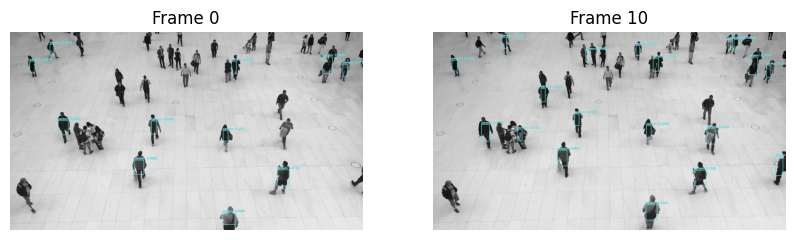

In [ ]:
# Frame 1
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].axis('off')  # Hide axes
axs[1].axis('off')  # Hide axes
axs[0].set_title("Frame 0")
axs[1].set_title("Frame 10")
axs[0].imshow(frame_list[0])
axs[1].imshow(frame_list[9])
plt.show()

## Streaming and Applying Object Detection Using A Large Model

In [ ]:
# Reset the Writer/Capture Variables
vs = cv2.VideoCapture(video)
writer = None
(W, H) = (None, None)

In [ ]:
# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))

# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

[INFO] 341 total frames in video


In [ ]:
# loop over frames from the video file stream

frame_count = 0
frame_list_large = []
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()
	frame_count +=1
	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break

	# if the frame dimensions are empty, grab them
	if W is None or H is None:
		(H, W) = frame.shape[:2]

	# construct a blob from the input frame and then perform a forward
	# pass of the YOLO object detector, giving us our bounding boxes
	# and associated probabilities
	blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),
		swapRB=True, crop=False)
	net_large.setInput(blob)
	start = time.time()
	layerOutputs = net_large.forward(outputLayersLarge)
	end = time.time()

	# initialize our lists of detected bounding boxes, confidences,
	# and class IDs, respectively
	boxes = []
	confidences = []
	classIDs = []

	# loop over each of the layer outputs
	for output in layerOutputs:
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability)
			# of the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]

			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > conf:
				# scale the bounding box coordinates back relative to
				# the size of the image, keeping in mind that YOLO
				# actually returns the center (x, y)-coordinates of
				# the bounding box followed by the boxes' width and
				# height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")

				# use the center (x, y)-coordinates to derive the top
				# and and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))

				# update our list of bounding box coordinates,
				# confidences, and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				classIDs.append(classID)

	# apply non-maxima suppression to suppress weak, overlapping
	# bounding boxes
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf,
		threshold)

	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])

			# draw a bounding box rectangle and label on the frame
			color = [int(c) for c in COLORS[classIDs[i]]]
			cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[classIDs[i]],
				confidences[i])
			cv2.putText(frame, text, (x, y - 5),
				cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		fourcc = cv2.VideoWriter_fourcc(*"MP4V")
		writer = cv2.VideoWriter("lio.mp4", fourcc, 30,
			(frame.shape[1], frame.shape[0]), True)

		# some information on processing single frame
		if total > 0:
			elap = (end - start)
			print("[INFO] single frame took {:.4f} seconds".format(elap))
			print("[INFO] estimated total time to finish: {:.4f}".format(
				elap * total))
	frame_list_large.append(frame)
 # Break after ten frames have written
 # Google COLAB takes long to process all frames
	if frame_count > 10:
		break
	# write the output frame to disk
	writer.write(frame)

[INFO] single frame took 4.9021 seconds
[INFO] estimated total time to finish: 1671.6080


## Video Result of Two Different Frames For a Large Model

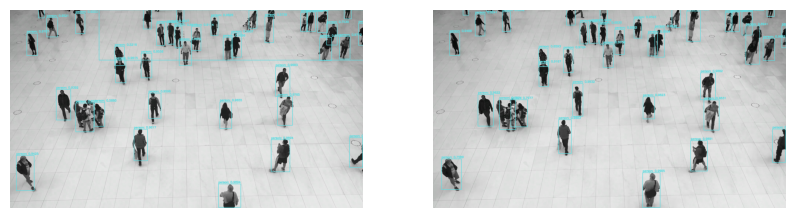

In [ ]:
# Frame 1
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].axis('off')  # Hide axes
axs[1].axis('off')  # Hide axes
axs[0].set_title("Frame 0")
axs[1].set_title("Frame 10")
axs[0].imshow(frame_list_large[0])
axs[1].imshow(frame_list_large[9])
plt.show()

## Frame Comparison Between Both Models

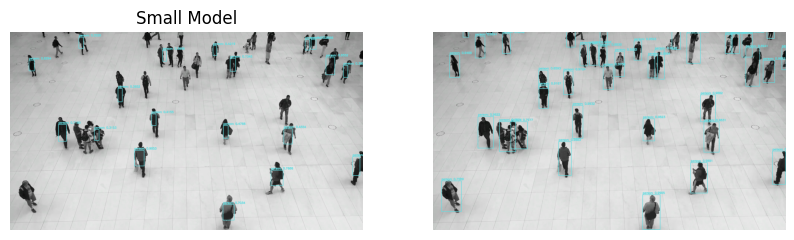

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].axis('off')  # Hide axes
axs[1].axis('off')  # Hide axes
axs[0].set_title("Small Model")
axs[1].set_title("Large Model")
axs[0].imshow(frame_list[9])
axs[1].imshow(frame_list_large[9])
plt.show()

In [ ]:
# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()